In [3]:
%matplotlib inline
from mlhalos import parameters
from mlhalos import features
from mlhalos import density
from mlhalos import machinelearning as ml
import pandas
import matplotlib.pyplot as plt
import numpy as np

# 20 FEATURES

In [14]:
df_20 = pandas.DataFrame(columns=['auc_val_score','auc_test_score'])
initial_parameters_20 = parameters.InitialConditionsParameters(ids_type='all')
density_contrasts_20 = density.DensityContrasts(initial_parameters=initial_parameters_20, num_filtering_scales=20)

density_contrast_in_20 = density_contrasts_i.density_contrast_in
density_contrast_out_20 = density_contrasts_i.density_contrast_out

In [15]:
for j in range(10):
    i_features_j = features.extract_features(features_type="EPS trajectories", 
                                              initial_parameters=initial_parameters_20,
                                              density_contrast_in=density_contrast_in_20, 
                                              density_contrast_out=density_contrast_out_20,
                                              rescale="standard", n_samples=2000)
    for z in range(2):
        k_folds = [5,10]
        train_set_j_cv_z = ml.MLAlgorithm(i_features_j, algorithm="Random Forest", num_cross_val_folds=k_folds[z])
        clf_j_z = train_set_j_cv_z.classifier
        params_j_z = clf_j_z.best_params_
        print(params_j_z)
        val_set_j_z_auc_score = clf_j_z.best_score_
        test_set_j_z_auc_score = ml.get_auc_score(train_set_j_cv_z.y_proba_predicted, train_set_j_cv_z.y_true)
        print(val_set_j_z_auc_score)
        print(test_set_j_z_auc_score)
        df_20.loc[j+z] =[val_set_j_z_auc_score,test_set_j_z_auc_score]

{'min_samples_split': 2, 'n_estimators': 70, 'min_samples_leaf': 10, 'criterion': 'gini', 'bootstrap': True, 'max_depth': None}
0.828033082624
0.834416459929
{'min_samples_split': 10, 'n_estimators': 30, 'min_samples_leaf': 10, 'criterion': 'gini', 'bootstrap': True, 'max_depth': 3}
0.824796174932
0.846898443172
{'min_samples_split': 10, 'n_estimators': 20, 'min_samples_leaf': 3, 'criterion': 'entropy', 'bootstrap': True, 'max_depth': 3}
0.828507122998
0.82093004272
{'min_samples_split': 10, 'n_estimators': 60, 'min_samples_leaf': 3, 'criterion': 'entropy', 'bootstrap': True, 'max_depth': 3}
0.823411266921
0.83076
{'min_samples_split': 2, 'n_estimators': 100, 'min_samples_leaf': 1, 'criterion': 'gini', 'bootstrap': True, 'max_depth': 3}
0.827822853279
0.818986175115
{'min_samples_split': 2, 'n_estimators': 20, 'min_samples_leaf': 3, 'criterion': 'entropy', 'bootstrap': True, 'max_depth': 3}
0.827949320356
0.832832995267
{'min_samples_split': 10, 'n_estimators': 30, 'min_samples_leaf': 

In [18]:
# First 10 rows is cv-5 and last 10 rows id cv-10
df_20 = pandas.DataFrame(columns=['auc_val_score','auc_test_score'])
df_20.loc[0]=[0.828033082624, 0.834416459929]
df_20.loc[1]=[0.828507122998, 0.82093004272]
df_20.loc[2]=[0.827822853279, 0.818986175115]
df_20.loc[3]=[0.84315, 0.822256907363]
df_20.loc[4]=[0.830870279146, 0.816831404354]
df_20.loc[5]=[0.833145281018, 0.836608800087]
df_20.loc[6]=[0.829146641937, 0.835261576106]
df_20.loc[7]=[0.818767568042, 0.812818720717]
df_20.loc[8]=[0.80762594698, 0.84818989071]
df_20.loc[9]=[0.832425886658, 0.817795807978]
df_20.loc[10]=[0.82969976519, 0.82573117939]
df_20.loc[11]=[0.824796174932, 0.84689844317]
df_20.loc[12]=[0.823411266921, 0.83076]
df_20.loc[13]=[0.827949320356, 0.832832995267]
df_20.loc[14]= [0.845330452579, 0.821717214384]
df_20.loc[15]= [0.818204081901, 0.855057100859]
df_20.loc[16]=[0.839653013128, 0.802979271064]
df_20.loc[17]= [0.835011169281, 0.815943777354]
df_20.loc[18]= [0.819806789179, 0.82016322742]
df_20.loc[19]= [0.809595703004, 0.83348]
df_20

,auc_val_score,auc_test_score
0,0.828033,0.834416
1,0.828507,0.820930
2,0.827823,0.818986
3,0.843150,0.822257
4,0.830870,0.816831
5,0.833145,0.836609
6,0.829147,0.835262
7,0.818768,0.812819
8,0.807626,0.848190
9,0.832426,0.817796


In [26]:
print(np.mean((df_20['auc_test_score']-df_20['auc_val_score'])[:10]))
print(np.std((df_20['auc_test_score']-df_20['auc_val_score'])[:10]))
print(np.mean((df_20['auc_test_score']-df_20['auc_val_score'])[10:20]))
print(np.std((df_20['auc_test_score']-df_20['auc_val_score'])[10:20]))
print(np.mean(df_20['auc_test_score'][:10]))
print(np.mean(df_20['auc_test_score'][10:20]))
print(np.std(df_20['auc_test_score'][:10]))
print(np.std(df_20['auc_test_score'][10:20]))

-0.001539887760299985
0.01652390757779206
0.001210547243700022
0.02182270687652384
0.8264095785079
0.8285563208908
0.01083467082281602
0.014228752941019048


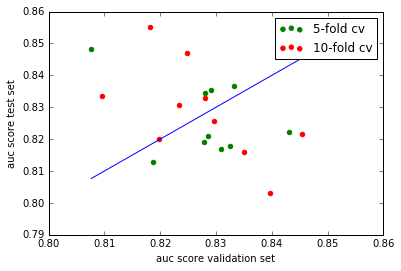

In [20]:
x=np.linspace(df_20['auc_val_score'].min(), df_20['auc_test_score'].max())
y=x
plt.plot(x,y)
plt.scatter(df_20['auc_val_score'][:10],df_20['auc_test_score'][:10],color='green',label="5-fold cv")
plt.scatter(df_20['auc_val_score'][10:20],df_20['auc_test_score'][10:20],color='red',label="10-fold cv")
plt.legend()
plt.xlabel("auc score validation set")
plt.ylabel("auc score test set")
plt.savefig('HPParam/20_features_scores_plot.jpg')

# 30 FEATURES

In [60]:
df_30 = pandas.DataFrame(columns=['auc_val_score','auc_test_score'])
initial_parameters_30 = parameters.InitialConditionsParameters(ids_type='all')
density_contrasts_30 = density.DensityContrasts(initial_parameters=initial_parameters_30, num_filtering_scales=30)

density_contrast_in_30 = density_contrasts_i.density_contrast_in
density_contrast_out_30 = density_contrasts_i.density_contrast_out

In [40]:
for j in range(10):
    i_features_j = features.extract_features(features_type="EPS trajectories", 
                                              initial_parameters=initial_parameters_30,
                                              density_contrast_in=density_contrast_in_30, 
                                              density_contrast_out=density_contrast_out_30,
                                              rescale="standard", n_samples=2000)
    for z in range(2):
        k_folds = [5,10]
        train_set_j_cv_z = ml.MLAlgorithm(i_features_j, algorithm="Random Forest", num_cross_val_folds=k_folds[z])
        clf_j_z = train_set_j_cv_z.classifier
        params_j_z = clf_j_z.best_params_
        print(params_j_z)
        val_set_j_z_auc_score = clf_j_z.best_score_
        test_set_j_z_auc_score = ml.get_auc_score(train_set_j_cv_z.y_proba_predicted, train_set_j_cv_z.y_true)
        print(val_set_j_z_auc_score)
        print(test_set_j_z_auc_score)
        df_30.loc[j+z] =[val_set_j_z_auc_score,test_set_j_z_auc_score]

{'min_samples_split': 2, 'n_estimators': 20, 'min_samples_leaf': 1, 'criterion': 'gini', 'bootstrap': True, 'max_depth': 3}
0.829919705147
0.833180147059
{'min_samples_split': 2, 'n_estimators': 100, 'min_samples_leaf': 3, 'criterion': 'gini', 'bootstrap': True, 'max_depth': 3}
0.826796895645
0.836922911457
{'min_samples_split': 10, 'n_estimators': 60, 'min_samples_leaf': 3, 'criterion': 'gini', 'bootstrap': True, 'max_depth': 3}
0.833306146978
0.822564598962
{'min_samples_split': 2, 'n_estimators': 100, 'min_samples_leaf': 10, 'criterion': 'gini', 'bootstrap': True, 'max_depth': 3}
0.838645164532
0.803158432419
{'min_samples_split': 1, 'n_estimators': 100, 'min_samples_leaf': 10, 'criterion': 'gini', 'bootstrap': True, 'max_depth': None}
0.838339031357
0.816190925533
{'min_samples_split': 10, 'n_estimators': 100, 'min_samples_leaf': 10, 'criterion': 'gini', 'bootstrap': True, 'max_depth': None}
0.828614838287
0.845133333333
{'min_samples_split': 10, 'n_estimators': 60, 'min_samples_le

In [27]:
# First 10 rows is cv-5 and last 10 rows id cv-10
df_30 = pandas.DataFrame(columns=['auc_val_score','auc_test_score'])
x=[[0.829919705147, 0.833180147059],
   [0.833306146978, 0.822564598962],
   [0.838339031357, 0.816190925533],
   [0.824742014925, 0.845255066387],
   [0.829636126894, 0.823138443061],
   [0.820924165864, 0.829983711644],
   [0.841711930393, 0.809098305465],
   [0.821645021645, 0.80541663359],
   [0.828996462138, 0.817138671875],
   [0.819125444139, 0.855034365673],
   [0.826796895645, 0.836922911457],
   [0.838645164532, 0.803158432419],
   [0.828614838287, 0.845133333333],
   [0.829636126894, 0.823138443061],
   [0.826648988582, 0.835418839068],
   [0.824253556339, 0.811474957965],
   [0.842815398144, 0.818887362637],
   [0.814358712315, 0.826124299513],
   [0.825051003644, 0.827540106952],
   [0.822301692992, 0.829834605598]]
for i in range(len(x)):
    df_30.loc[i] = x[i]

df_30

,auc_val_score,auc_test_score
0,0.829920,0.833180
1,0.833306,0.822565
2,0.838339,0.816191
3,0.824742,0.845255
4,0.829636,0.823138
5,0.820924,0.829984
6,0.841712,0.809098
7,0.821645,0.805417
8,0.828996,0.817139
9,0.819125,0.855034


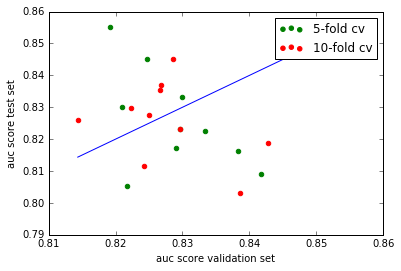

In [8]:
x=np.linspace(df_30['auc_val_score'].min(), df_30['auc_test_score'].max())
y=x
plt.plot(x,y)
plt.scatter(df_30['auc_val_score'][:10],df_30['auc_test_score'][:10],color='green',label="5-fold cv")
plt.scatter(df_30['auc_val_score'][10:20],df_30['auc_test_score'][10:20],color='red',label="10-fold cv")
plt.legend()
plt.xlabel("auc score validation set")
plt.ylabel("auc score test set")
plt.savefig('HPParam/30_features_scores_plot.jpg')

In [32]:
print("The mean difference between auc test score and auc val score for 5-cv is "+str(np.mean((df_30['auc_test_score']-df_30['auc_val_score'])[:10])))
print("The standard deviation of the difference between auc test score and auc val score for 5-cv is "+str(np.std((df_30['auc_test_score']-df_30['auc_val_score'])[:10])))
print("The mean difference between auc test score and auc val score for 10-cv is "+str(np.mean((df_30['auc_test_score']-df_30['auc_val_score'])[10:20])))
print("The standard deviation of the difference between auc test score and auc val score for 5-cv is "+str(np.std((df_30['auc_test_score']-df_30['auc_val_score'])[10:20])))
print("The mean of the auc test scores for 5-cv is "+str(np.mean(df_30['auc_test_score'][:10])))
print("The mean of the auc test scores for 10-cv is "+str(np.mean(df_30['auc_test_score'][10:20])))
print("The standard deviation of the auc test scores for 5-cv is "+str(np.std(df_30['auc_test_score'][:10])))
print("The standard deviation of the auc test scores for 10-cv is "+str(np.std(df_30['auc_test_score'][10:20])))

The mean difference between auc test score and auc val score for 5-cv is -0.0031345180231000082
The standard deviation of the difference between auc test score and auc val score for 5-cv is 0.019545959646795744
The mean difference between auc test score and auc val score for 10-cv is -0.0021489085370999805
The standard deviation of the difference between auc test score and auc val score for 5-cv is 0.016263056397710605
The mean of the auc test scores for 5-cv is 0.8257000869248999
The mean of the auc test scores for 10-cv is 0.8257633292002999
The standard deviation of the auc test scores for 5-cv is 0.014779549318887792
The standard deviation of the auc test scores for 10-cv is 0.01175641353379959


# 50 FEATURES

In [102]:
df_50_cv_5 = pandas.DataFrame(columns=['auc_val_score','auc_test_score'])
df_50_cv_10 = pandas.DataFrame(columns=['auc_val_score','auc_test_score'])
initial_parameters_50 = parameters.InitialConditionsParameters(ids_type='all')
density_contrasts_50 = density.DensityContrasts(initial_parameters=initial_parameters_50, num_filtering_scales=50)

density_contrast_in_50 = density_contrasts_i.density_contrast_in
density_contrast_out_50 = density_contrasts_i.density_contrast_out

In [103]:
for j in range(10):
    i_features_j = features.extract_features(features_type="EPS trajectories", 
                                              initial_parameters=initial_parameters_30,
                                              density_contrast_in=density_contrast_in_30, 
                                              density_contrast_out=density_contrast_out_30,
                                              rescale="standard", n_samples=2000)
    for z in range(2):
        k_folds = [5,10]
        train_set_j_cv_z = ml.MLAlgorithm(i_features_j, algorithm="Random Forest", num_cross_val_folds=k_folds[z])
        clf_j_z = train_set_j_cv_z.classifier
        params_j_z = clf_j_z.best_params_
        print(params_j_z)
        val_set_j_z_auc_score = clf_j_z.best_score_
        test_set_j_z_auc_score = ml.get_auc_score(train_set_j_cv_z.y_proba_predicted, train_set_j_cv_z.y_true)
        print(val_set_j_z_auc_score)
        print(test_set_j_z_auc_score)
        if z==0:
            df_50_cv_5.loc[j+z] =[val_set_j_z_auc_score,test_set_j_z_auc_score]
        elif z==1:
            df_50_cv_10.loc[j+z] =[val_set_j_z_auc_score,test_set_j_z_auc_score]

{'min_samples_split': 10, 'n_estimators': 30, 'min_samples_leaf': 10, 'criterion': 'entropy', 'bootstrap': True, 'max_depth': None}
0.836834649725
0.83597729202
{'min_samples_split': 10, 'n_estimators': 150, 'min_samples_leaf': 10, 'criterion': 'entropy', 'bootstrap': True, 'max_depth': None}
0.8378887762
0.834916327454
{'min_samples_split': 2, 'n_estimators': 30, 'min_samples_leaf': 10, 'criterion': 'gini', 'bootstrap': True, 'max_depth': None}
0.834718481467
0.847782738095
{'min_samples_split': 1, 'n_estimators': 150, 'min_samples_leaf': 10, 'criterion': 'entropy', 'bootstrap': True, 'max_depth': None}
0.830297046703
0.859010909091
{'min_samples_split': 10, 'n_estimators': 70, 'min_samples_leaf': 10, 'criterion': 'gini', 'bootstrap': True, 'max_depth': 3}
0.834703153651
0.853303564045
{'min_samples_split': 10, 'n_estimators': 20, 'min_samples_leaf': 1, 'criterion': 'gini', 'bootstrap': True, 'max_depth': 3}
0.841767052922
0.858972184532
{'min_samples_split': 10, 'n_estimators': 20, '

In [34]:
#here it's one cv-5, one cv-10 etc. SO values for cv 5 are df_50[::2] and values for cv 10 are like df_50{1::2}
df_50= pandas.DataFrame(columns=['auc_val_score','auc_test_score'])
x=[[0.836834649725,
0.83597729202],
   [0.8378887762,
0.834916327454],
   [0.834718481467,
0.847782738095],
   [0.830297046703,
0.859010909091],
   [0.834703153651,
0.853303564045],
   [0.841767052922,
0.858972184532],
   [0.806368323191,
0.83176799441],
   [0.807705193491,
0.820780386928],
   [0.829064039409,
0.796304862453],
   [0.832906958312,
0.802473262032],
   [0.817149945408,
0.839423076923],
   [0.822832712405,
0.81065270936],
   [0.829293598667,
0.824873026005],
   [0.827721497253,
0.834662543403],
   [0.822741318746,
0.836296117546],
   [0.815613830585,
0.860888139098],
   [0.827992872422,
0.859524197049],
   [0.82932722752,
0.842865186615],
   [0.827813565745,
0.856244694397],
   [0.835775,
0.819100219256]]
for i in range(len(x)):
    df_50.loc[i] = x[i]

df_50

,auc_val_score,auc_test_score
0,0.836835,0.835977
1,0.837889,0.834916
2,0.834718,0.847783
3,0.830297,0.859011
4,0.834703,0.853304
5,0.841767,0.858972
6,0.806368,0.831768
7,0.807705,0.820780
8,0.829064,0.796305
9,0.832907,0.802473


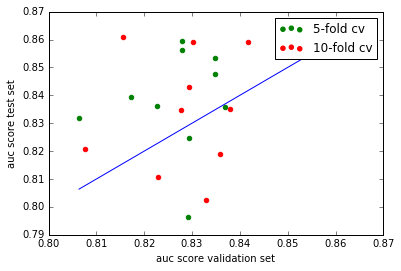

In [36]:
x=np.linspace(df_50['auc_val_score'].min(), df_50['auc_test_score'].max())
y=x
plt.plot(x,y)
plt.scatter(df_50['auc_val_score'][::2],df_50['auc_test_score'][::2],color='green',label="5-fold cv")
plt.scatter(df_50['auc_val_score'][1::2],df_50['auc_test_score'][1::2],color='red',label="10-fold cv")
plt.legend()
plt.xlabel("auc score validation set")
plt.ylabel("auc score test set")
plt.savefig('HPParam/50_features_scores_plot.jpg')

In [37]:
print("The mean difference between auc test score and auc val score for 5-cv is "+str(np.mean((df_50['auc_test_score']-df_50['auc_val_score'])[::2])))
print("The standard deviation of the difference between auc test score and auc val score for 5-cv is "+str(np.std((df_50['auc_test_score']-df_50['auc_val_score'])[::2])))
print("The mean difference between auc test score and auc val score for 10-cv is "+str(np.mean((df_50['auc_test_score']-df_50['auc_val_score'])[1::2])))
print("The standard deviation of the difference between auc test score and auc val score for 5-cv is "+str(np.std((df_50['auc_test_score']-df_50['auc_val_score'])[1::2])))
print("The mean of the auc test scores for 5-cv is "+str(np.mean(df_50['auc_test_score'][::2])))
print("The mean of the auc test scores for 10-cv is "+str(np.mean(df_50['auc_test_score'][1::2])))
print("The standard deviation of the auc test scores for 5-cv is "+str(np.std(df_50['auc_test_score'][::2])))
print("The standard deviation of the auc test scores for 10-cv is "+str(np.std(df_50['auc_test_score'][1::2])))

The mean difference between auc test score and auc val score for 5-cv is 0.011481761451200001
The standard deviation of the difference between auc test score and auc val score for 5-cv is 0.018491358989430162
The mean difference between auc test score and auc val score for 10-cv is 0.00624865723779997
The standard deviation of the difference between auc test score and auc val score for 5-cv is 0.021315885003692626
The mean of the auc test scores for 5-cv is 0.8381497562943
The mean of the auc test scores for 10-cv is 0.8344321867768999
The standard deviation of the auc test scores for 5-cv is 0.017562733972256946
The standard deviation of the auc test scores for 10-cv is 0.019964775782656485


# SUMMARY

In [55]:
std_summary= pandas.DataFrame(columns=['20 features','30 features', '50 features'],index=['5-fold cv', '10-fold cv'])
std= [[np.std(df_20['auc_test_score'][:10]),np.std(df_30['auc_test_score'][:10]),np.std(df_50['auc_test_score'][::2])],[np.std(df_20['auc_test_score'][10:20]),np.std(df_30['auc_test_score'][10:20]),np.std(df_50['auc_test_score'][1::2])]]

std_summary.loc['5-fold cv']=std[0]
std_summary.loc['10-fold cv']=std[1]
std_summary.to_csv('HPParam/summary standard deviation.csv')